# Models results and scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, NearestCentroid
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb
from scipy.fft import fft, ifft
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import roc_auc_score, f1_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

In [4]:
dataset = pd.read_csv("dataset.csv")
y=dataset.iloc[:,-1]
X=dataset.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
dataset.shape

(601, 12003)

###  Best scoring models
###### Over 85% on "score" function. Full development found on model_tesbench

In [18]:
SVC_classifier = SVC(random_state=1, kernel='rbf', C=80, gamma=0.0001).fit(X_train,y_train)

In [19]:
GradientBoost_classifier=GradientBoostingClassifier().fit(X_train, y_train)

In [31]:
red1=PCA(0.95)
X_train_PCA1=red1.fit_transform(X_train)
X_test_PCA1=red1.transform(X_test)
X_PCA1=red1.transform(X)
RandomForest_classifier=RandomForestClassifier().fit(X_train_PCA1, y_train)

In [21]:
LGBM_classifier = lgb.LGBMClassifier(num_leaves=40,learning_rate=0.001,n_estimators=1000,max_depth=5)
LGBM_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)],eval_metric=['multi_error','multiclass'],early_stopping_rounds=70, verbose=False)

LGBMClassifier(learning_rate=0.001, max_depth=5, n_estimators=1000,
               num_leaves=40)

In [22]:
NaybeBayesBernoulli_classifier=BernoulliNB(alpha=0.075, binarize=0, fit_prior=True).fit(X_train, y_train)
y_test_prediction=NaybeBayesBernoulli_classifier.predict_proba(X_test)
y_test_class=NaybeBayesBernoulli_classifier.predict(X_test)

In [32]:
red2=PCA(.95)
X_train_PCA2=red2.fit_transform(X_train)
X_test_PCA2=red2.transform(X_test)
X_PCA2=red2.transform(X)
NaybeBayesGaussian_classifier=GaussianNB().fit(X_train_PCA2, y_train)

## Representation and score visualization

In [24]:
SVC_y_pred=SVC_classifier.predict(X_test)
GB_y_pred=GradientBoost_classifier.predict(X_test)
RF_y_pred=RandomForest_classifier.predict(X_test_PCA1)
LGBM_y_pred=LGBM_classifier.predict(X_test)
NBB_y_pred=NaybeBayesBernoulli_classifier.predict(X_test)
NBG_y_pred=NaybeBayesGaussian_classifier.predict(X_test_PCA2)

In [25]:
print("Higher is better\n\n")
print("SVC:\n",classification_report(y_test, SVC_y_pred), "\n")
print("Gradient boost:\n",classification_report(y_test, GB_y_pred), "\n")
print("Random forest:\n",classification_report(y_test, RF_y_pred), "\n")
print("LightGradientBoost:\n",classification_report(y_test, LGBM_y_pred), "\n")
print("Naybe Bayes Bernouilly:\n",classification_report(y_test, NBB_y_pred), "\n")
print("Naybe Bayes Gaussian:\n",classification_report(y_test, NBG_y_pred), "\n")

Higher is better


SVC:
               precision    recall  f1-score   support

           1       0.97      0.92      0.94        65
           2       0.91      0.98      0.94        60
           3       0.94      0.91      0.93        56

    accuracy                           0.94       181
   macro avg       0.94      0.94      0.94       181
weighted avg       0.94      0.94      0.94       181
 

Gradient boost:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95        65
           2       0.87      0.92      0.89        60
           3       0.89      0.88      0.88        56

    accuracy                           0.91       181
   macro avg       0.91      0.91      0.91       181
weighted avg       0.91      0.91      0.91       181
 

Random forest:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        65
           2       0.88      0.95      0.91        60
           3 

### Confusion matrix (test split) 

SVC:


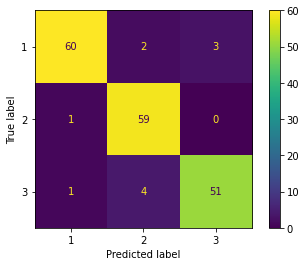


Gradient Boost:


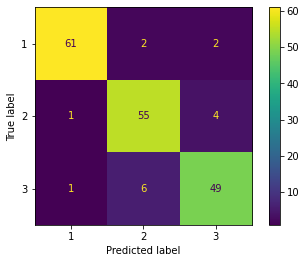


Random_forest:


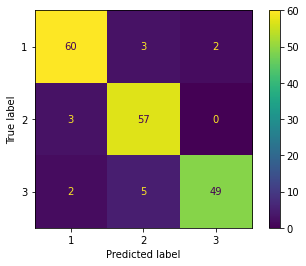


LightGBM:


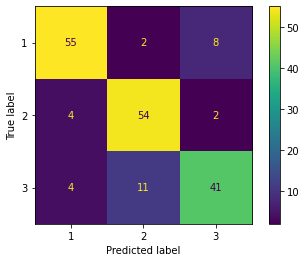


NaybeBayes Bernouilly:


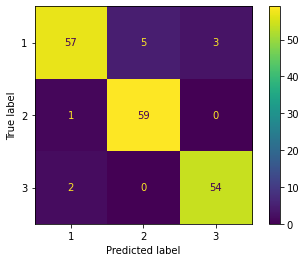


NaybeBayes Gaussian:


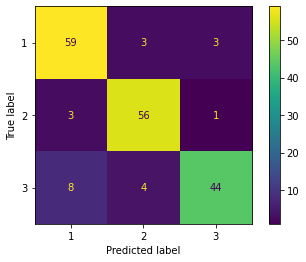

In [26]:
print("SVC:")
plot_confusion_matrix(SVC_classifier, X_test, y_test)
plt.show(1)
print("\nGradient Boost:")
plot_confusion_matrix(GradientBoost_classifier, X_test, y_test)
plt.show(2)
print("\nRandom_forest:")
plot_confusion_matrix(RandomForest_classifier, X_test_PCA1, y_test)
plt.show(3)
print("\nLightGBM:")
plot_confusion_matrix(LGBM_classifier, X_test, y_test)
plt.show(4)
print("\nNaybeBayes Bernouilly:")
plot_confusion_matrix(NaybeBayesBernoulli_classifier, X_test, y_test)
plt.show(5)
print("\nNaybeBayes Gaussian:")
plot_confusion_matrix(NaybeBayesGaussian_classifier, X_test_PCA2, y_test)
plt.show(5)

### Confusion matrix (full dataset) 

SVC:


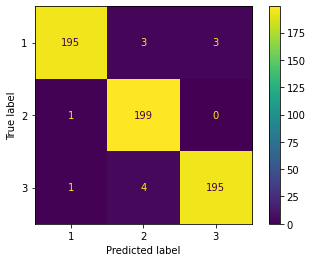


Gradient Boost:


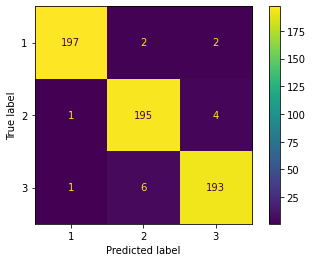


Random_forest:


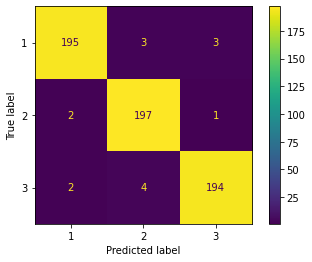


LightGBM:


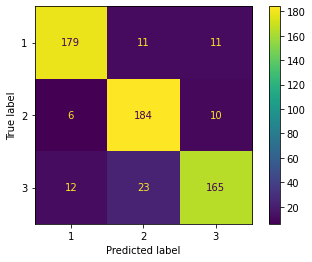


NaybeBayes Bernouilly:


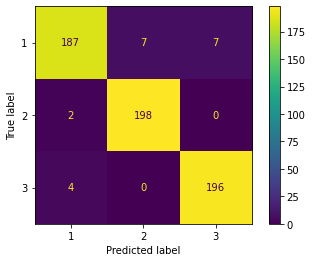


NaybeBayes Gaussian:


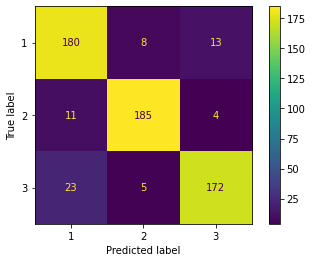

In [36]:
print("SVC:")
plot_confusion_matrix(SVC_classifier, X, y)
plt.show(1)
print("\nGradient Boost:")
plot_confusion_matrix(GradientBoost_classifier, X, y)
plt.show(2)
print("\nRandom_forest:")
plot_confusion_matrix(RandomForest_classifier,X_PCA1, y)
plt.show(3)
print("\nLightGBM:")
plot_confusion_matrix(LGBM_classifier, X, y)
plt.show(4)
print("\nNaybeBayes Bernouilly:")
plot_confusion_matrix(NaybeBayesBernoulli_classifier, X, y)
plt.show(5)
print("\nNaybeBayes Gaussian:")
plot_confusion_matrix(NaybeBayesGaussian_classifier, X_PCA2, y)
plt.show(5)

## Prediction Time 

In [37]:
%time SVC_y_pred=SVC_classifier.predict(X_test)
%time GB_y_pred=GradientBoost_classifier.predict(X_test)
%time RF_y_pred=RandomForest_classifier.predict(X_test_PCA1)
%time GBM_y_pred=LGBM_classifier.predict(X_test)
%time NBB_y_pred=NaybeBayesBernoulli_classifier.predict(X_test)
%time NBG_y_pred=NaybeBayesGaussian_classifier.predict(X_test_PCA2)

CPU times: user 825 ms, sys: 8.52 ms, total: 834 ms
Wall time: 833 ms
CPU times: user 79.7 ms, sys: 98 µs, total: 79.8 ms
Wall time: 79.7 ms
CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 12.6 ms
CPU times: user 87.9 ms, sys: 0 ns, total: 87.9 ms
Wall time: 66.5 ms
CPU times: user 135 ms, sys: 3.38 ms, total: 139 ms
Wall time: 125 ms
CPU times: user 0 ns, sys: 5.4 ms, total: 5.4 ms
Wall time: 1.37 ms
